# GES en Europe

![Texte alternatif](874F0385-1D82-4388-BA93-A9A5380AE5E8.webp)

Parmi les 5 grands secteurs d'émissions de CO2 dans l'UE seul le transport intérieur connaît une augmentation entre 1990 et 2019 (25%) tandis que les autres diminuent sur la même période. Nous avons donc orienté nos recherches exploratoires sur ce sujet là précisément pour chercher à le comprendre dans un premier temps puis si possible à terme à apporter des éléments de réponses pour l'expliquer. 

![Texte alternatif](0D633C46-37B2-4AA8-B901-C7557FCA725F.webp
)

En 2019, d'ailleurs on peut voir la répartition des émissions de GES par mode de transport dans l'UE en 2019.
Ce qu'on doit retenir ici c'est que les transports routiers représentent une grande majorité des emissions de gaz à effet de serre du secteur transport intérieur dans l'UE.

![Texte alternatif](Répartition-des-émissions-de-GES-en-France-en-2018.png)

Dans ce contexte Européen on a voulu faire un zoom sur la France pour découvrir ce qu'il en était à notre échelle. En 2018, on s'aperçoit que le transport représente la plus grosse part des émissions de gaz à effet de serre (30%).
Plusieurs questions viennent alors à se poser :
- Quels transports sont concernés ? Quelles sont les émissions produites selon les types de transports à l'échelle française ?
- Quelle est la tendance de ces émissions de CO2 liés au Transport en France au fil du temps ?
- Quelle est la variation de ces émissions selon les territoires (régions, départements) ?


# 1er Dataset : Emission CO2 Transports France et International

In [1]:
!pip install geopandas

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [3]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv("emission-co2-perimetre-complet (1).csv", sep = ';')

In [4]:
df["Train"] = df['Train_Empreinte carbone (kgCO2e)'] / df["Distance entre les gares"]
df["Bus"] = df['Autocar longue distance - Empreinte carbone (kgCO2e)'] / df['Distance entre les gares']
df["Voiture thermique"] = df['Voiture thermique (2,2 pers.)_Empreinte carbone (kgCO2e)'] / df['Distance entre les gares']
df["Voiture electrique"] = df['Voiture électrique (2,2 pers.) - Empreinte carbone (kgCO2e)'] / df['Distance entre les gares']
df["Avion"] = df['Avion_Empreinte carbone (kgCO2e)'] / df["Distance entre les gares"]

df["Trajet"] = df["Origine"] + " - " + df["Destination"]

In [5]:
# Fonction de coloration
def highlight_columns(column):
    return ['background-color: yellow' if column.name in ["Train", "Bus", "Voiture thermique", "Voiture electrique", "Avion"] else '' for _ in column]

# Appliquer le style au DataFrame
styled_df = df.style.apply(highlight_columns, axis=0)

# Affichage
styled_df

,Transporteur,Origine,Origine_uic,Destination,Destination_uic,Distance entre les gares,Train_Empreinte carbone (kgCO2e),Autocar longue distance - Empreinte carbone (kgCO2e),Avion_Empreinte carbone (kgCO2e),"Voiture électrique (2,2 pers.) - Empreinte carbone (kgCO2e)","Voiture thermique (2,2 pers.)_Empreinte carbone (kgCO2e)",Train,Bus,Voiture thermique,Voiture electrique,Avion,Trajet
0,TGV,Paris Montparnasse,87391003,Rennes,87471003,363.952000,1.055461,20.251500,71.363400,27.589000,63.278600,0.002900,0.055643,0.173865,0.075804,0.196079,Paris Montparnasse - Rennes
1,TGV,Paris Montparnasse,87391003,Angers-St-Laud,87484006,303.000000,0.878700,10.384500,nan,14.147000,32.447800,0.002900,0.034272,0.107088,0.046690,nan,Paris Montparnasse - Angers-St-Laud
2,Intercités,Paris Gare de Lyon,87686006,Vichy,87732008,364.000000,2.548000,14.110500,nan,19.223000,44.090200,0.007000,0.038765,0.121127,0.052810,nan,Paris Gare de Lyon - Vichy
3,TER,Paris Austerlitz,87547000,Orléans,87543009,121.000000,2.952400,4.692000,nan,6.392000,14.660800,0.024400,0.038777,0.121164,0.052826,nan,Paris Austerlitz - Orléans
4,TER,Toulouse-Matabiau,87611004,Perpignan,87784009,210.000000,5.124000,7.141500,nan,9.729000,22.314600,0.024400,0.034007,0.106260,0.046329,nan,Toulouse-Matabiau - Perpignan
5,International,Paris Nord,88194060,Koeln HBF,80154583,823.000000,6.337100,17.181000,nan,23.406000,53.684400,0.007700,0.020876,0.065230,0.028440,nan,Paris Nord - Koeln HBF
6,International,Paris Gare de Lyon,87686006,Milano P Garibaldi,83016451,877.000000,6.752900,31.498500,91.998600,42.911000,98.421400,0.007700,0.035916,0.112225,0.048929,0.104901,Paris Gare de Lyon - Milano P Garibaldi
7,TGV,Paris Montparnasse,87391003,Toulouse Matabiau,87611004,793.993000,2.302580,23.425500,84.403700,31.913000,73.196200,0.002900,0.029503,0.092187,0.040193,0.106303,Paris Montparnasse - Toulouse Matabiau
8,TGV,Paris Gare de Lyon,87686006,Mâcon Loché TGV,87725705,369.000000,1.070100,13.903500,nan,18.941000,43.443400,0.002900,0.037679,0.117733,0.051331,nan,Paris Gare de Lyon - Mâcon Loché TGV
9,TER,Paris-Nord,87271007,Amiens,87313874,131.000000,3.196400,4.864500,nan,6.627000,15.199800,0.024400,0.037134,0.116029,0.050588,nan,Paris-Nord - Amiens


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Transporteur                                                 119 non-null    object 
 1   Origine                                                      119 non-null    object 
 2   Origine_uic                                                  119 non-null    int64  
 3   Destination                                                  119 non-null    object 
 4   Destination_uic                                              119 non-null    int64  
 5   Distance entre les gares                                     119 non-null    float64
 6   Train_Empreinte carbone (kgCO2e)                             119 non-null    float64
 7   Autocar longue distance - Empreinte carbone (kgCO2e)         119 non-null    flo

In [7]:
df.columns

Index(['Transporteur', 'Origine', 'Origine_uic', 'Destination', 'Destination_uic', 'Distance entre les gares', 'Train_Empreinte carbone (kgCO2e)',
       'Autocar longue distance - Empreinte carbone (kgCO2e)', 'Avion_Empreinte carbone (kgCO2e)', 'Voiture électrique (2,2 pers.) - Empreinte carbone (kgCO2e)',
       'Voiture thermique (2,2 pers.)_Empreinte carbone (kgCO2e)', 'Train', 'Bus', 'Voiture thermique', 'Voiture electrique', 'Avion', 'Trajet'],
      dtype='object')

In [8]:
# Methodes
## Camembert
def nombre_occurence_pie():
    transporteur_mean = df['Transporteur'].value_counts()


    plt.figure(figsize=(8, 8))
    plt.pie(
        transporteur_mean.values,
        labels=transporteur_mean.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('viridis', len(transporteur_mean))
    )

    plt.title('Répartition des occurrences par transporteur', fontsize=14)

    plt.tight_layout()
    plt.show()

##
def trajets():

    fig = px.treemap(df, 
                  path=['Transporteur', 'Origine', 'Destination'], 
                  title='Émissions des trajets par transporteur et gares')

    fig.show()

##
def emission_moyenne():
    emissions_par_transporteur = df.groupby("Transporteur")["Train"].mean()
    emissions_par_transporteur_df = emissions_par_transporteur.reset_index()
    emissions_par_transporteur_df.columns = ["Transporteur", "Moyenne des émissions"]

    autocar = pd.DataFrame({
        "Transporteur": ["Bus"],
        "Moyenne des émissions": [df["Bus"].mean()]
    })

    voitelec = pd.DataFrame({
        "Transporteur": ["Voiture electrique"],
        "Moyenne des émissions": [df["Voiture electrique"].mean()]
    })

    voither = pd.DataFrame({
        "Transporteur": ["Voiture thermique"],
        "Moyenne des émissions": [df["Voiture thermique"].mean()]
    })
        
    emissions_par_transporteur_df = pd.concat([emissions_par_transporteur_df, autocar], ignore_index=True)
    emissions_par_transporteur_df = pd.concat([emissions_par_transporteur_df, voitelec], ignore_index=True)
    emissions_par_transporteur_df = pd.concat([emissions_par_transporteur_df, voither], ignore_index=True)
    #print(emissions_par_transporteur_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=emissions_par_transporteur_df["Transporteur"],
        y=emissions_par_transporteur_df["Moyenne des émissions"],
        palette="YlOrRd",
        legend = False
    )

    plt.title("Émissions calculées par transporteur", fontsize=16)
    plt.xlabel("Transporteur", fontsize=14)
    plt.ylabel("Émissions (kgCO2e / km)", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

##
def emission_variance():
    emissions_par_transporteur = df.groupby("Transporteur")["Train"].var()

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=emissions_par_transporteur.index,
        y=emissions_par_transporteur.values,
        palette="Purples"
    )

    plt.title("Émissions calculées par transporteur", fontsize=16)
    plt.xlabel("Transporteur", fontsize=14)
    plt.ylabel("Émissions (kgCO2e / km)", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

##
def avion_emission():

    vols_internationaux = ["Bruxelles Midi Brussel Zuid", "London St-Pancras", "Frankfurt Main HBF", "Milano P Garibaldi", "Amsterdam Centraal", "Barcelona Sants", "Luxembourg", "Torino Porta Susa", "Zuerich HB", "Muenchen HBF", "Geneve", "Schiphol Airport", "Stuttgart HBF", "Bruxelles N Aero", "Lausanne", "Basel SBB"]

    df["Vol International"] = df.apply(lambda x: "Oui" if x["Origine"] in vols_internationaux or x["Destination"] in vols_internationaux else "Non", axis=1)
    
    results = df.loc[df["Avion"].notnull(), ["Origine", "Destination", "Distance entre les gares", "Avion", "Vol International"]]

    print(results.sort_values(by="Avion", ascending=False))

    sns.scatterplot(
        data=results,
        x="Distance entre les gares",
        y="Avion",
        hue="Vol International",
        palette={"Oui": "red", "Non": "blue"},
        alpha=0.7
    )

    plt.title("Ratio d'émission avion en fonction de la distance (Vol International ou Non)")
    plt.xlabel("Distance entre les gares")
    plt.ylabel("Ratio d'émission avion")
    plt.legend(title="Vol International")
    plt.grid(True)
    plt.show()

##
def avion_train_voiture():

    df_long = df.loc[df["Avion"].notnull()]
    #print(df_long[["Trajet", "Avion"]])


    df_long = df_long.melt(
        id_vars=["Trajet"],
        var_name="Mode de transport",
        value_name="Émissions (kgCO2e / km)"
    )

    df_long = df_long.loc[df_long["Mode de transport"].isin(["Train", "Bus", "Voiture electrique", "Voiture thermique", "Avion"])]
    ordre = ["Train", "Bus", "Voiture electrique", "Voiture thermique", "Avion"]

    sns.set(rc={'figure.autolayout': False})
    sns.set(style="whitegrid")

    g = sns.catplot(
        data=df_long,
        x="Mode de transport",
        y="Émissions (kgCO2e / km)",
        kind="violin",
        height=6,
        aspect=1.5,
        palette="viridis",
        inner=None,
        order=ordre
    )

    sns.swarmplot(data=df_long, x="Mode de transport", y="Émissions (kgCO2e / km)", size=3, color="white")

    g.set_xticklabels(rotation=0, fontsize=10)
    g.fig.suptitle("Émissions de gaz à effet de serre par trajet et mode de transport", fontsize=16)
    g.set_axis_labels("Trajet", "Émissions (kgCO2e / km)")

    plt.tight_layout()

    plt.show()

##
def train_voiture():

    df["Emission bus"] = df['Autocar longue distance - Empreinte carbone (kgCO2e)'] / df['Distance entre les gares']
    df["Voiture thermique"] = df['Voiture thermique (2,2 pers.)_Empreinte carbone (kgCO2e)'] / df['Distance entre les gares']
    df["Voiture electrique"] = df['Voiture électrique (2,2 pers.) - Empreinte carbone (kgCO2e)'] / df['Distance entre les gares']
    df["Trajet"] = df["Origine"] + " - " + df["Destination"]


    df_long = df.melt(
        id_vars=["Trajet"],
        var_name="Mode de transport",
        value_name="Émissions (kgCO2e / km)"
    )

    df_long = df_long.loc[df_long["Mode de transport"].isin(["Train", "Bus", "Voiture electrique", "Voiture thermique"])]
    ordre = ["Train", "Bus", "Voiture electrique", "Voiture thermique"]

    sns.set(rc={'figure.autolayout': False})
    sns.set(style="whitegrid")

    sns.stripplot(
        data=df_long,
        x="Mode de transport",
        y="Émissions (kgCO2e / km)",
        hue="Mode de transport",
        jitter=True,
        palette="viridis",
        order=ordre
    )
    plt.title("Émissions par Trajet et Mode de Transport", fontsize=16)
    plt.xlabel("Trajets", fontsize=12)
    plt.ylabel("Émissions (kgCO2e / km)", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

##
def ligne():
    df_long = df.melt(
        id_vars=["Distance entre les gares"],
        value_vars=["Train_Empreinte carbone (kgCO2e)", "Autocar longue distance - Empreinte carbone (kgCO2e)", "Avion_Empreinte carbone (kgCO2e)", "Voiture électrique (2,2 pers.) - Empreinte carbone (kgCO2e)", "Voiture thermique (2,2 pers.)_Empreinte carbone (kgCO2e)"],
        var_name="Mode de transport",
        value_name="Émissions (kgCO2e / km)"
    )

    plt.figure(figsize=(12, 8))
    sn = sns.lmplot(
        data=df_long, 
        x="Distance entre les gares", 
        y="Émissions (kgCO2e / km)", 
        hue="Mode de transport"
    )

    sn.legend.remove()
    plt.title("Émissions de CO2 par mode de transport en fonction de la distance", fontsize=16)
    plt.xlabel("Distance entre les gares (km)", fontsize=14)
    plt.ylabel("Émissions (kgCO2e / km)", fontsize=14)
    plt.legend(title="Mode de transport")
    plt.tight_layout()

    plt.show()

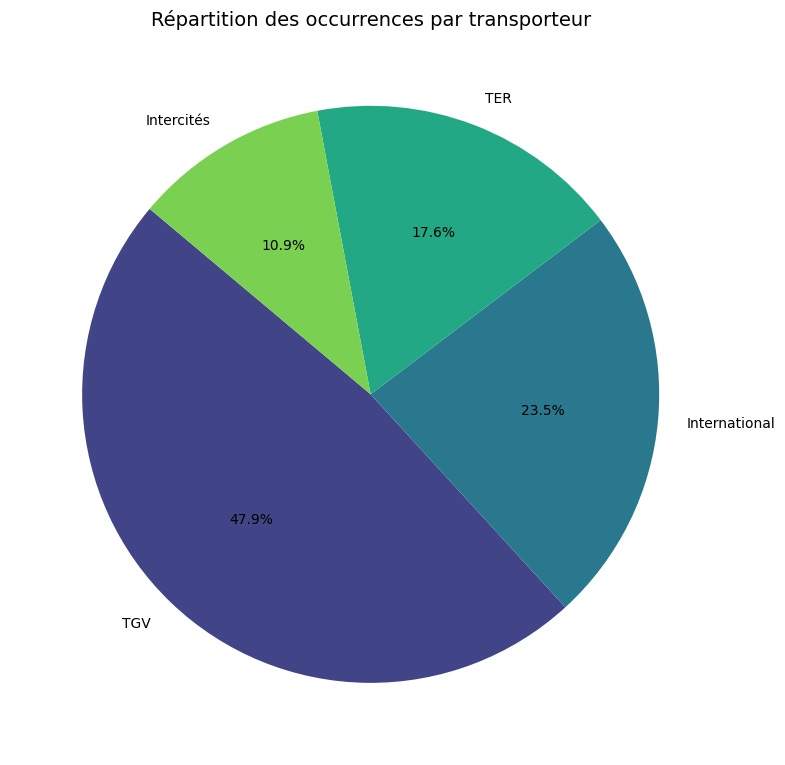

In [9]:
nombre_occurence_pie()

In [10]:
# emission_variance()

/var/folders/5w/jbysldxx6d32vym0rw5yrssm0000gn/T/ipykernel_4139/1858990303.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


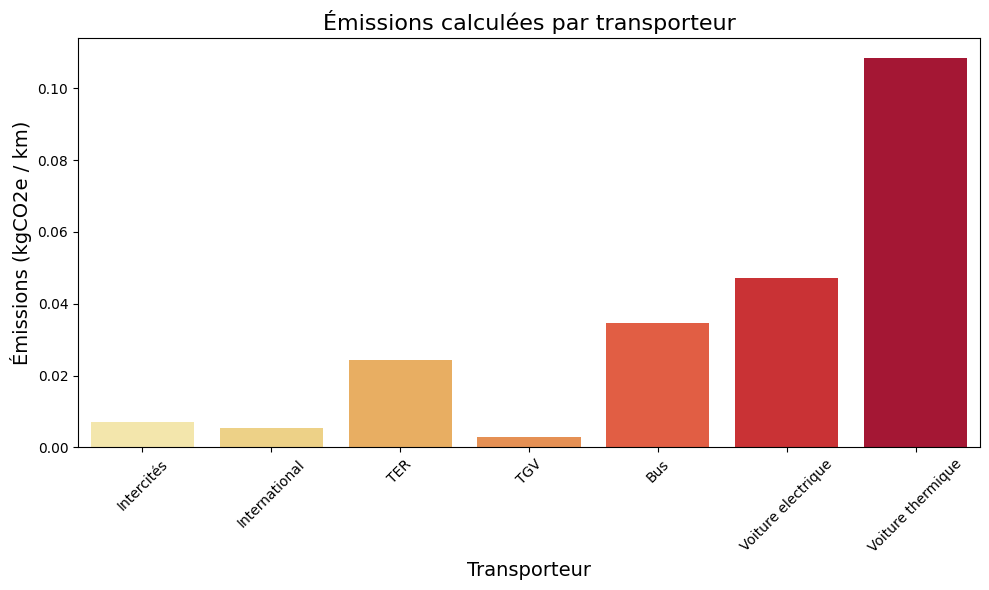

In [11]:
emission_moyenne()

                              Origine                  Destination  Distance entre les gares     Avion Vol International
106                Paris Montparnasse          Bordeaux Saint-Jean                   537.130  0.241337               Non
53                 Paris Gare de Lyon               Lyon Part Dieu                   429.496  0.238787               Non
16   Aéroport Charles de Gaulle 2 TGV               Lyon Part Dieu                   442.000  0.235566               Non
19                 Paris Gare de Lyon      Marseille Saint-Charles                   750.138  0.229716               Non
20                 Paris Gare de Lyon                       Toulon                   812.000  0.223114               Non
92                     Lyon Part Dieu      Marseille Saint-Charles                   325.000  0.221856               Non
81                   Strasbourg Ville                       Nantes                   834.000  0.221598               Non
18   Aéroport Charles de Gaulle 

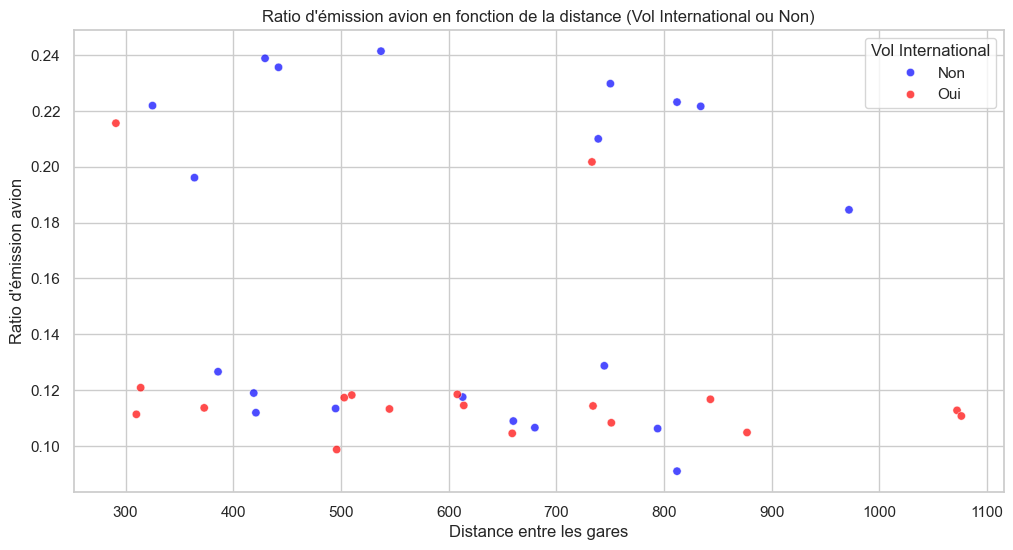

In [34]:
avion_emission()

<Figure size 1200x800 with 0 Axes>

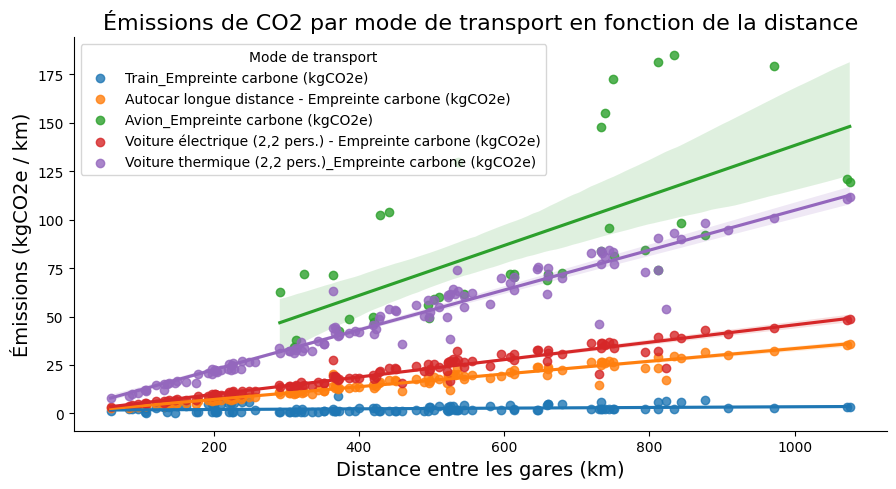

In [13]:
ligne()

/var/folders/5w/jbysldxx6d32vym0rw5yrssm0000gn/T/ipykernel_4139/1858990303.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


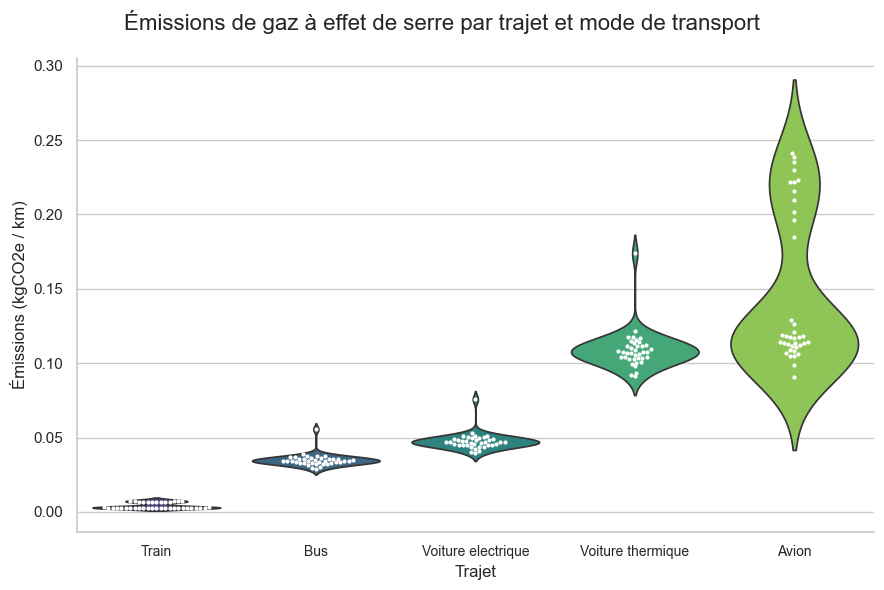

In [14]:
avion_train_voiture()

# Conclusion 
### Poursuite de l'exploration :
- Expliquer ces deux catégories d'avion polluants ? Erreurs de données ? Types d'avion et carburant 
- Faire une critique sur la moyenne des émissions par Transporteur (Train)
- Poursuivre l'exploration pour obtenir un Nombre de lignes plus grand (sur les Trains notamment)
  
### Ajout du Prix selon les transports 
Ce qui serait intéressant c'est d'ajouter le coût moyen d'un km parcouru selon le transport ce qui mettrait en évidence les différences . 

### Remarque
On remarque que la voiture eletrique qui est l'une des récentes innovations qui tend à se démocratiser mais pour autant il existe des transports bien plus anciens/classiques qui ont de meilleurs rendement.

### Transition 

# 2ème Dataset : Analyse des Facteurs d'Émissions Routières à l'échechelle française (HBEFA v4.1)

### Objectifs :
- <span style="color:green;">Explorer les tendances des émissions en fonction de la catégorie des véhicules, de leur carburant et type de circulation.</span>
- <span style="color:green;">Identifier les catégories les plus émettrices de polluants.</span>
- <span style="color:green;">Visualiser l’évolution des émissions dans le temps.</span>

In [15]:
# Configurations générales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Chargement des données
data = pd.read_csv("etude-facteurs-d'emissions-des-differents-modes-de-transport-routier.csv") 

In [16]:
# Aperçu des données
data.head()

,Année,Véhicule,Carburant,Roulage,CO (g/km),HC (g/km),NOx (g/km),Particules (g/km)
0,2020,2RM,essence,France,2.696,0.429,0.111,0.030
1,2020,2RM,essence,Rural,3.438,0.400,0.123,0.029
2,2020,2RM,essence,Urbain,1.572,0.458,0.090,0.031
3,2021,2RM,essence,France,2.418,0.395,0.098,0.031
4,2021,2RM,essence,Rural,3.080,0.371,0.109,0.030


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Année              264 non-null    int64  
 1   Véhicule           264 non-null    object 
 2   Carburant          264 non-null    object 
 3   Roulage            264 non-null    object 
 4   CO (g/km)          264 non-null    float64
 5   HC (g/km)          264 non-null    float64
 6   NOx (g/km)         264 non-null    float64
 7   Particules (g/km)  264 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 16.6+ KB


Ce jeu de données est issu de la base de données européenne HBEFA v4.1 (Handbook of emissions factors for Road Transport) qui fournit des facteurs d’émissions, c’est-à-dire des émissions de polluants en g/km pour toutes les catégories de véhicules routiers (voiture particulière, véhicule utilitaire léger, véhicule lourd et deux-roues motorisé), chacune étant divisée en plusieurs sous-catégories, pour une grande variété de situations de trafic (type de voirie, vitesse limite et niveau de saturation du trafic associé). Les données extraites sont des facteurs d’émissions agrégés de CO, HC, NOx et particules par catégorie de véhicules (voiture, véhicule utilitaire léger, poids lourd, autocar, bus et deux roues motorisées), par carburant (essence, gazole et GNV uniquement pour les bus), pour des conditions de circulation moyennes (urbain, rural et mixte France) et pour chaque année allant de 2020 à 2030.

Les données semblent bien organisées, sans valeurs manquantes et sans valeurs aberrantes évidentes à première vue.
En revanche, seule les véhicules routiers sont présents dans ce jeu de données. Certaines typologies de véhicules sont absentes : Train, Avion, Bateau, Trotinnette electrique et Vélo notamment. De plus, Si nous voulons évaluer le bilan carbonne des véhicules il faudra trouver un moyen de convertir chaque émission en équivalent CO2 (métrique utilisée pour définir le bilan carbonne d'une activité humaine). 

In [18]:
# Suppression des lignes contenant des valeurs manquantes
data_cleaned = data.dropna()
# Vérification des doublons
print(data_cleaned.duplicated().sum())

0


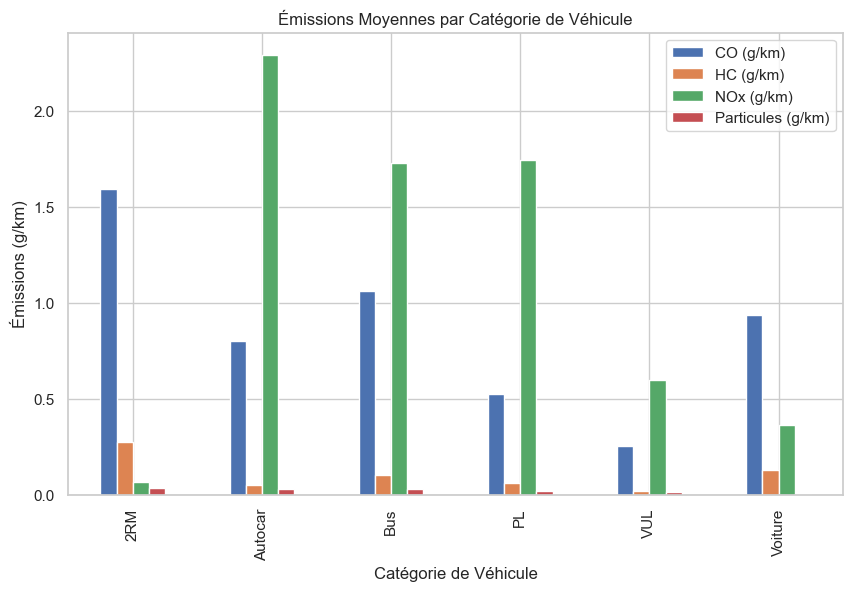

In [19]:
polluants = ['CO (g/km)', 'HC (g/km)', 'NOx (g/km)', 'Particules (g/km)']

# Émissions moyennes par type de véhicule
emissions_par_vehicule = data.groupby('Véhicule')[polluants].mean()
#print(emissions_par_vehicule)

# Visualisation
emissions_par_vehicule.plot(kind='bar', figsize=(10, 6))
plt.title('Émissions Moyennes par Catégorie de Véhicule')
plt.ylabel('Émissions (g/km)')
plt.xlabel('Catégorie de Véhicule')
plt.show()

On peut voir que les catégories Autocar, Bus, Poids Lourd, Véhicule utilitaire léger émettent plus de NOx (Monoxyde et dioxyde d'azote) que les deux roues et les voitures en g/km. A la lecture de ce graphique on peut se demander : 
- Est-ce que ce le poids du véhicule influence la ses émissions et si oui, de quelles manières ?

A l'inverse les catégories deux roues et voiture émettent plus de CO :
- Existe-t-il une corrélation avec une variable cachée qui serait le poids des véhicules et selon celui-ci cela impacterait les émissions de CO et de NOx ?

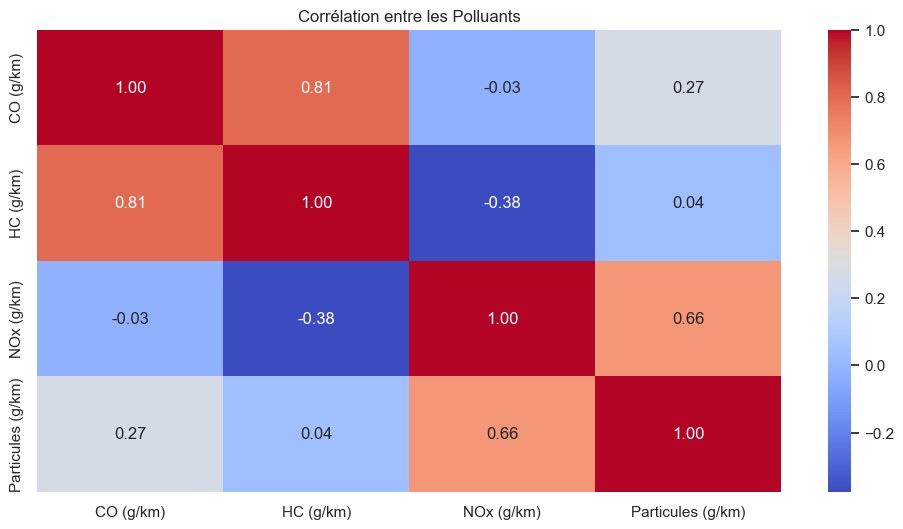

In [20]:
# Matrice de corrélation
corr = data[polluants].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les Polluants")
plt.show()

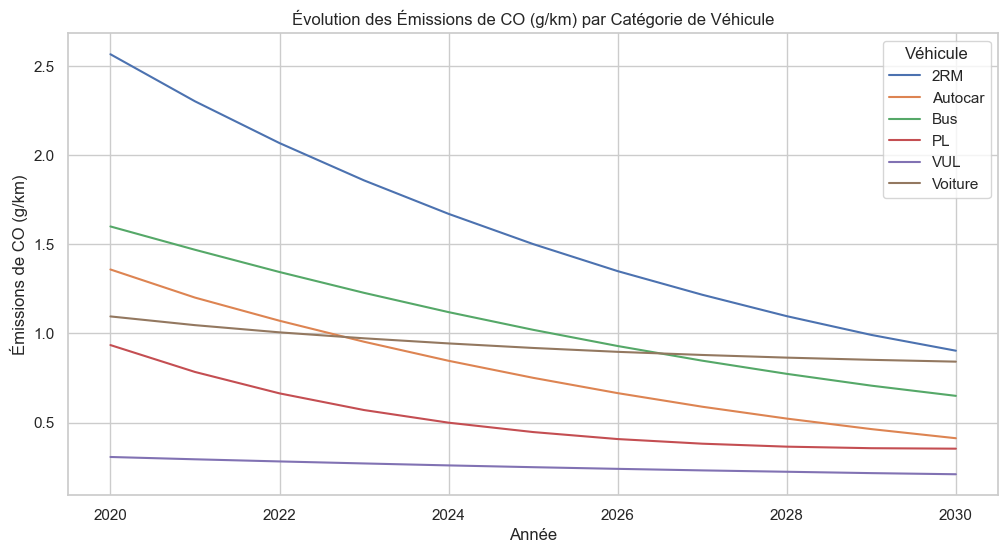

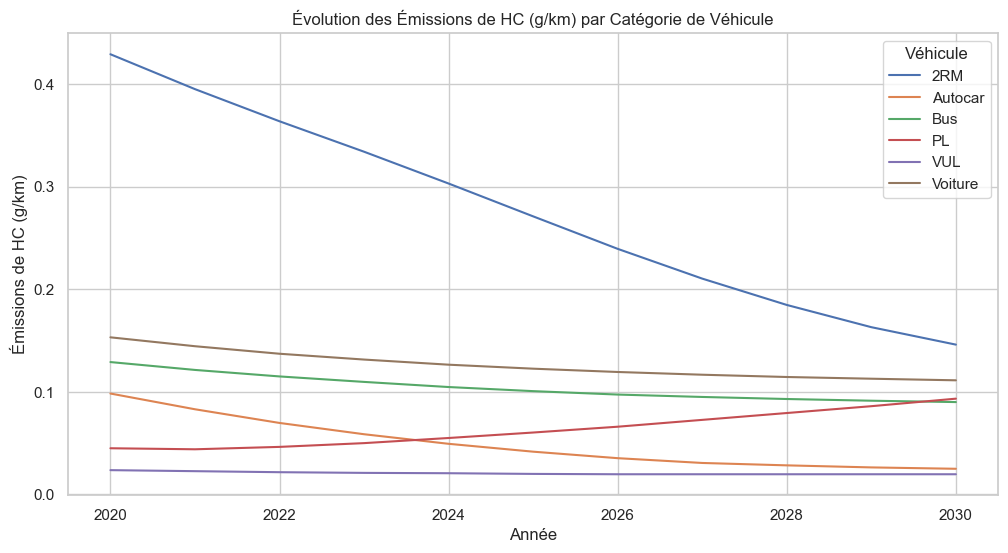

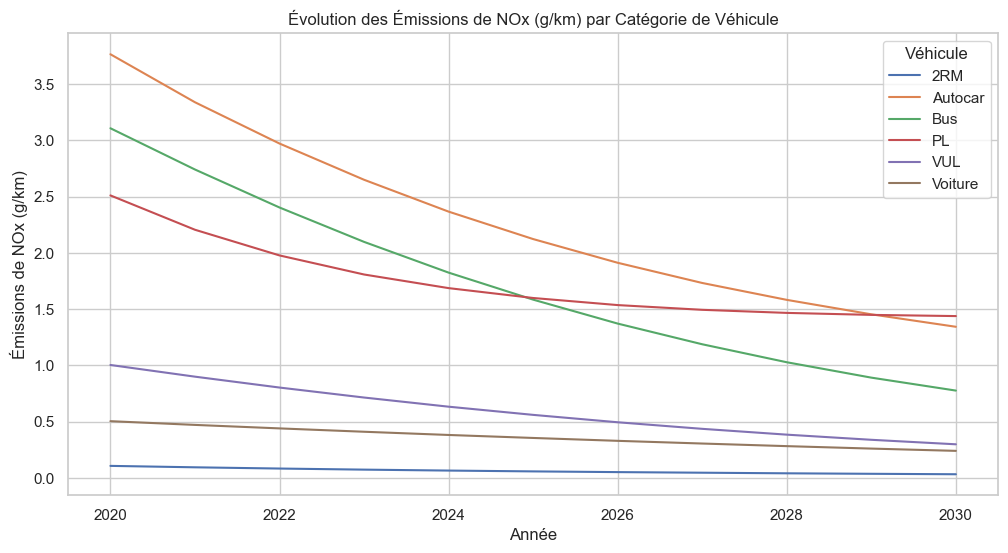

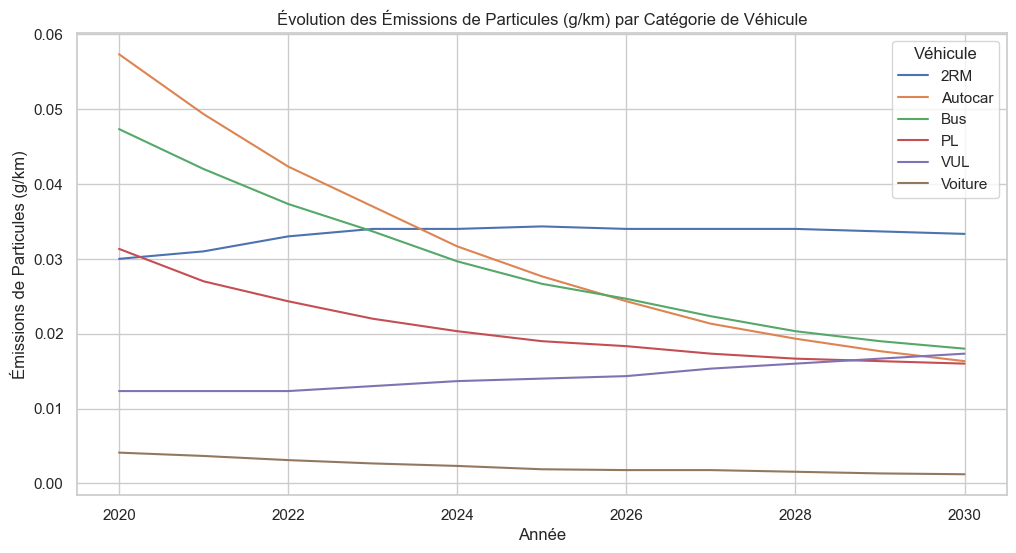

In [32]:
# Agrégation des données
emissions_temps = data_cleaned.groupby(['Année', 'Véhicule'])[polluants].mean().reset_index()

for polluant in polluants:
    # Visualisation pour NOx (exemple)
    sns.lineplot(data=emissions_temps, x='Année', y=polluant, hue='Véhicule')
    plt.title(f'Évolution des Émissions de {polluant} par Catégorie de Véhicule')
    plt.ylabel(f"Émissions de {polluant}")
    plt.xlabel('Année')
    plt.show()

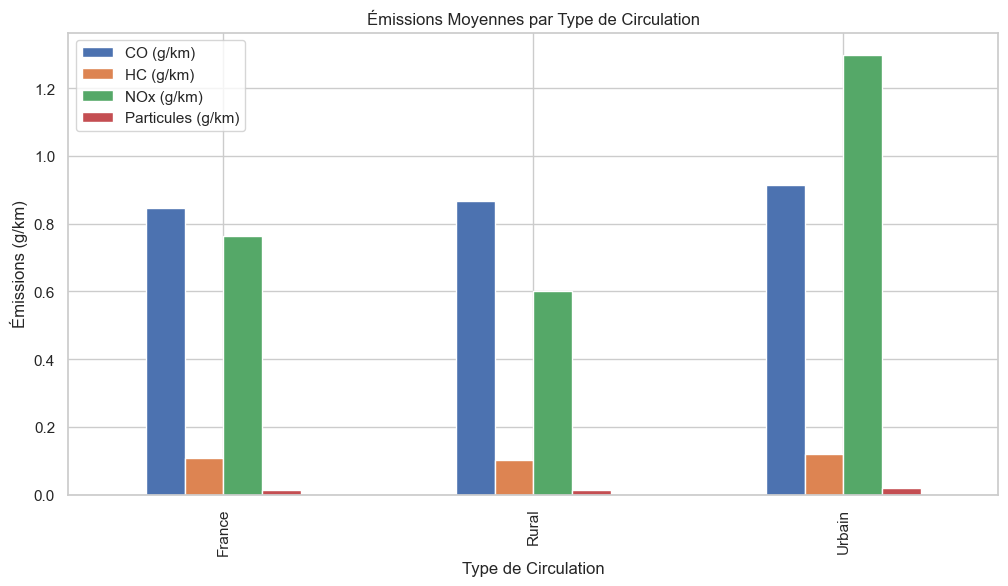

In [33]:
# Moyennes par type de circulation
emissions_circulation = data_cleaned.groupby('Roulage')[polluants].mean()

# Visualisation
emissions_circulation.plot(kind='bar')
plt.title('Émissions Moyennes par Type de Circulation')
plt.ylabel('Émissions (g/km)')
plt.xlabel('Type de Circulation')
plt.show()

In [23]:
# Boucle pour chaque polluant
#for polluant in polluants:
    #plt.figure(figsize=(10, 6))  # Taille de la figure
    ## Parcourir chaque année unique
    #for annee in data['Année'].unique():
        #data_annee = data[data['Année'] == annee]  # Filtrer les données par année
        ## Tracer une courbe de densité pour chaque année
        #sns.kdeplot(data_annee[polluant], label=f"Année {annee}", fill=False)
    
    ## Ajouter des détails au graphique
    #plt.title(f"Évolution des émissions de {polluant} par année")
    #plt.xlabel(f"Émissions de {polluant}")
    #plt.ylabel("Densité")
    #plt.legend(title="Années")
    #plt.grid(True)
    #plt.show()

# 3ème Dataset : Émissions de GES et distance moyenne des trajets domicile-travail selon le département de résidence en 2019

<p style="font-family:Verdana; font-size:14px;">Ce dataset contient des informations sur les émissions de GES (Gaz à Effet de Serre) et la distance moyenne des trajets domicile-travail pour 96 départements français. L'objectif est de vérifier la relation entre les émissions de GES et la distance parcourue, tout en identifiant les départements qui émettent le plus de GES. Une analyse par région géographique permettra de comparer et de classer les départements en fonction de leurs émissions de GES.</p>

<h1 style="font-family:Arial; color:black; font-size:15px;">1 - Importation de mes librairies et importation de mon dataset.J'identifie le type du DataFrame, remplace les virgules par des points dans les colonnes numériques, convertit les colonnes de GES et Distance en float pour les rendre manipulables.</h1> 

In [24]:
#Lire mon dataset  
ds = pd.read_csv('Figure1.csv' , sep = ';', encoding='ISO-8859-1') 
ds.head(97)       

#Type de mes données 
type(ds) 
print(type(ds))    
 
#Transformer mes virgules en points 
colonnes_a_modifier = ['Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)', 'Distance domicile-travail moyenne\n(en km)']
for col in colonnes_a_modifier:
    ds[col] = ds[col].str.replace(",", ".", regex=False)
ds.head(97)

#Passer les valeurs numeriques en type float pour pouvoir les manipuler 
ds['Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)'] = ds['Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)'].astype(float)
ds['Distance domicile-travail moyenne\n(en km)'] = ds['Distance domicile-travail moyenne\n(en km)'].astype(float)

ds.head(97)

<class 'pandas.core.frame.DataFrame'>


,Numéro de département,Nom de département,Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an),Distance domicile-travail moyenne\n(en km)
0,01,Ain,0.930,17.5
1,02,Aisne,0.957,17.7
2,03,Allier,0.748,12.9
3,04,Alpes-de-Haute-Provence,0.810,13.9
4,05,Hautes-Alpes,0.597,9.8
5,06,Alpes-Maritimes,0.543,10.3
6,07,Ardèche,0.778,13.2
7,08,Ardennes,0.877,15.2
8,09,Ariège,0.859,15.0
9,10,Aube,0.745,12.6


In [25]:

#Générer mes statistiques descriptives
stat = ds.drop(columns=['Nom de département']).describe()
stat

,Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an),Distance domicile-travail moyenne\n(en km)
count,96.000000,96.000000
mean,0.770021,14.227083
std,0.156850,2.798326
min,0.098000,6.900000
25%,0.727000,12.975000
50%,0.793000,13.900000
75%,0.837500,15.250000
max,1.102000,24.300000


In [26]:
#Renommer 
# Définir les noms exacts des colonnes
col_ges = 'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)'
col_km = 'Distance domicile-travail moyenne\n(en km)'

#MAX MIN MOYENNE GES et KM  
max_ges = ds[col_ges].max()
min_ges = ds[col_ges].min()
mean_ges = ds[col_ges].mean()

max_km = ds[col_km].max() 
min_km = ds[col_km].min()
mean_km = ds[col_km].mean()
 
# Affichage des résultats
print("GES : Max =", max_ges, ", Min =", min_ges, ", Moyenne =", mean_ges)
print("KM : Max =", max_km, ", Min =", min_km, ", Moyenne =", mean_km)

#Matrice de correlation 
correlation_matrix = ds[[col_km, col_ges]].corr()
# Renommer les colonnes pour un affichage propre 
correlation_matrix.index = ["Distance Moyenne (KM)", "GES (tCO2e)"]
correlation_matrix.columns = ["Distance Moyenne (KM)", "GES (tCO2e)"]
    
# Afficher avec un meilleur format  
print("Matrice de corrélation :\n")  
print(correlation_matrix.round(3))  # Limiter à 3 décimales pour plus de lisibilité


GES : Max = 1.102 , Min = 0.098 , Moyenne = 0.7700208333333333
KM : Max = 24.3 , Min = 6.9 , Moyenne = 14.227083333333333
Matrice de corrélation :

                       Distance Moyenne (KM)  GES (tCO2e)
Distance Moyenne (KM)                  1.000        0.716
GES (tCO2e)                            0.716        1.000


<h1 style="font-family:Arial; color:black; font-size:15px;">Matrice de correlation : </h1>
Il existe une corrélation positive forte (0.716) entre la distance domicile-travail et les émissions de GES. Cela signifie que lorsque la distance moyenne augmente, les émissions de GES augmentent également de manière significative.

<h1 style="font-family:Arial; color:black; font-size:15px;">4 - Ce code crée un graphique de régression linéaire montrant la relation entre la distance moyenne domicile-travail (km) et les émissions de GES (tCO2e). Il affiche un nuage de points (points bleus) et une droite de régression (ligne rouge) avec les annotations des valeurs minimales, maximales et moyennes de GES et de distance, ainsi que les intersections entre nos valeurs min, max et moy entre les deux colonnes.</h1>

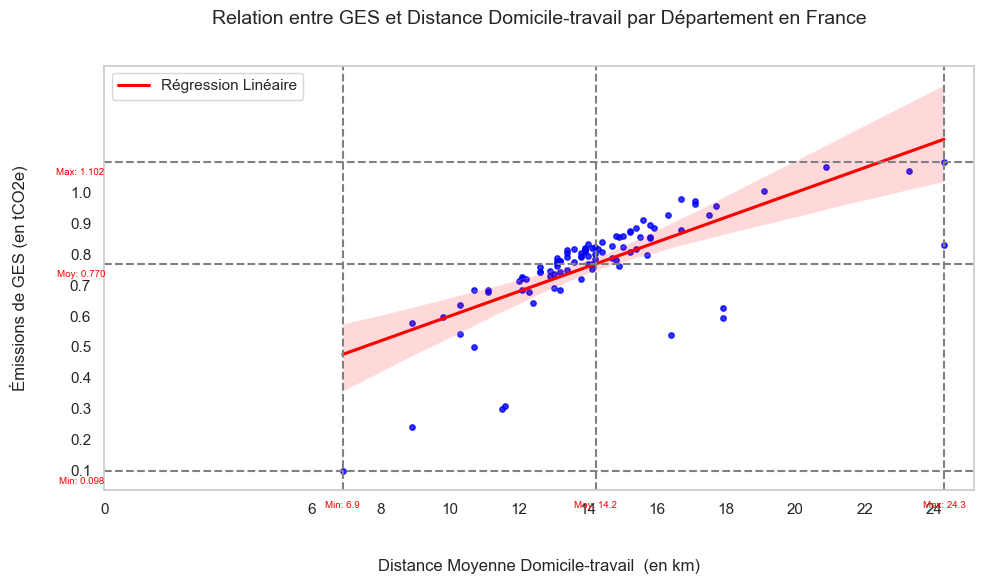

Les départements en dessous de la régression linéaire sont :
['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint-Denis', 'Val-de-Marne', 'Val-dOise']


In [28]:
# Création du graphique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Nuage de points et droite de régression
sns.regplot(
    data=ds, 
    x=col_km, 
    y=col_ges,
    line_kws={"color": "red", "label": "Régression Linéaire"},  # Style de la ligne
    scatter_kws={"s": 15, "color": "blue"}  # Style des points
)

# Affichage des valeurs sur l'axe Y
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xticks([0, 6, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0])

# Annotation des valeurs (Min, Max, Moy de KM) avec décalage vers la gauche, en rouge et en gras
plt.text(min_km, -0.03, f'Min: {min_km:.1f}', ha='center', va='bottom', color='red', fontsize=7)
plt.text(mean_km, -0.03, f'Moy: {mean_km:.1f}', ha='center', va='bottom', color='red', fontsize=7)
plt.text(max_km, -0.03, f'Max: {max_km:.1f}', ha='center', va='bottom', color='red', fontsize=7)

# Annotation des valeurs (Min, Max, Moy de GES) pour les GES sur l'axe Y
plt.text(min_ges - 0.1, min_ges - 0.05, f'Min: {min_ges:.3f}', ha='right', va='bottom', color='red', fontsize=7)
plt.text(mean_ges - 0.75, mean_ges - 0.05, f'Moy: {mean_ges:.3f}', ha='right', va='bottom', color='red', fontsize=7)
plt.text(max_ges - 1.1, max_ges - 0.05, f'Max: {max_ges:.3f}', ha='right', va='bottom', color='red', fontsize=7)

# Traits rouges pour relier les valeurs
for (x, y) in [(min_km, min_ges), (mean_km, mean_ges), (max_km, max_ges)]:
    plt.axvline(x, color='grey', linestyle='--')
    plt.axhline(y, color='grey', linestyle='--')


#Les points qui s'écartent de ma régression 

# Personnalisation du graphique
plt.title('Relation entre GES et Distance Domicile-travail par Département en France', fontsize=14, pad=30)
plt.xlabel('Distance Moyenne Domicile-travail  (en km)', fontsize=12, labelpad=30)
plt.ylabel('Émissions de GES (en tCO2e)', fontsize=12, labelpad=30)

# Ajouter une légende pour la droite de régression
plt.legend()
plt.grid(False)  
plt.tight_layout()   
  
# Afficher le graphique
plt.show()    


#Départements en dessous de la régression 
print("Les départements en dessous de la régression linéaire sont :")
print(['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint-Denis', 'Val-de-Marne', 'Val-dOise'])
 


  

<h1 style="font-family:Arial; color:black; font-size:15px;">Points bleus (nuage de points) : </h1>Chaque point bleu représente un département, chaque département est représenté par son abcisse x (KM) et son ordonnée y (GES)
<h1 style="font-family:Arial; color:black; font-size:15px;">Droite de régression (ligne rouge) : </h1>La droite de régression illustre la relation linéaire entre la distance et les émissions de GES. Elle montre que plus la distance domicile-travail augmente, plus les émissions de GES augmentent également.  GES = a×KM + b

<h1 style="font-family:Arial; color:black; font-size:15px;">Intervalle de confiance (Zone en Rouge pale) : </h1>
Plus l'intervalle est étroit, plus la droite de régression est précise pour modéliser la relation entre les deux variables (GES et distance).
Si l'intervalle est large, cela signifie qu'il existe plus de variabilité dans les données, donc la relation est moins fiable.
Si l'intervalle est étroit, cela indique que la relation est plus robuste et prévisible, dans notre cas pour des distances entre (10-18 km) et s'élargit légèrement pour les distances très courtes ou très longues, indiquant plus d'incertitude à ces extrémités.


<h1 style="font-family:Arial; color:black; font-size:15px;"> Conclusion :  </h1>
La concentration des points au centre indique que la majorité des départements ont des distances moyennes domicile-travail comprises entre 10 et 18 km et des émissions de GES entre 0.5 et 0.8 tCO2e. Quelques points s'écartent de la tendance, indiquant des variations spécifiques à certains départements.
Ce graphique montre donc qu'il existe une  RELATION DIRECT POSITIVE ENTRE LES DEUX VARIABLES (Car elles progréssent dans la meme direction) donc il existe une correlation


<h1 style="font-family:Arial; color:black; font-size:15px;">5 - Ce code trace une carte de la France segmentée par départements en affichant les émissions de GES (tCO2e/an) avec un dégradé de couleurs et les numéros des départements au centre de chaque polygone.</h1>

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Nom de la colonne GES trouvé : GES (tCO2e / an)


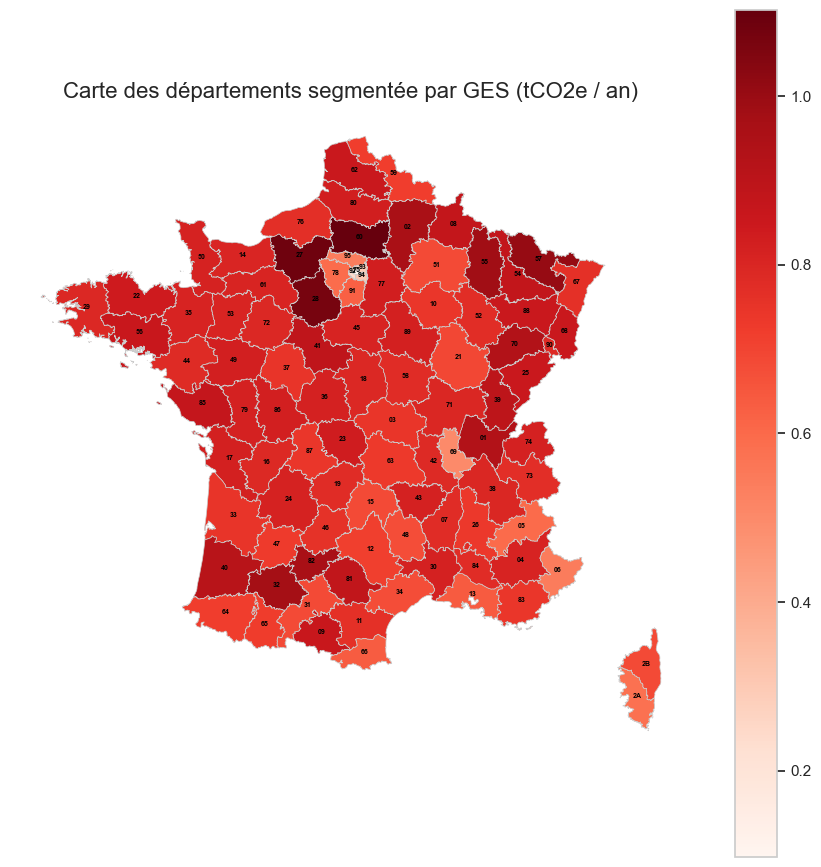

In [29]:
#### #Charger les fichiers CSV et GeoJSON
geojson_path = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
departements_gdf = gpd.read_file(geojson_path)

#Afficher les colonnes du fichier CSV
#print("Colonnes du CSV :", ds.columns)

#Renommer les colonnes pour simplifier l'accès
ds.rename(columns={
    'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)': 'GES (tCO2e / an)'
}, inplace=True)

#Vérifiez les colonnes après renommage
#print("Colonnes après renommage :", ds.columns)

#Colonnes fusionnées 
departements_gdf['code'] = departements_gdf['code'].astype(str)
ds['Numéro de département'] = ds['Numéro de département'].astype(str)

#Fusionner les données GeoJSON et ma Figure1
merged = departements_gdf.merge(ds, left_on='code', right_on='Numéro de département', how='left')

# Afficher les colonnes du GeoDataFrame fusionné
#print("Colonnes du GeoDataFrame fusionné :", merged.columns)

#Supprimer les géométries nulles
merged = merged[~merged['geometry'].isnull()]
   
#Supprimer les espaces invisibles des noms de colonnes
merged.columns = merged.columns.str.strip()

#Vérifier les colonnes après suppression des espaces
#print("Colonnes après suppression des espaces :", merged.columns)

# Vérifier si la colonne "GES" existe dans merged
for col in merged.columns:
    if 'GES' in col:
        print(f"Nom de la colonne GES trouvé : {col}")

#Tracer la carte
fig, ax = plt.subplots(1, 1, figsize=(11, 11))

#Tracer la carte avec un dégradé de couleurs
column_to_display = 'GES (tCO2e / an)' 
if column_to_display in merged.columns:
    merged.plot(
        column=column_to_display,
        cmap='Reds',
        linewidth=0.5,
        ax=ax,
        edgecolor='0.8',
        legend=True
    )
else:
    print(f"Erreur : La colonne '{column_to_display}' n'existe pas dans merged")

#Ajouter les numéros de départements sur la carte
for idx, row in merged.iterrows():
    centroid = row['geometry'].centroid  # Calculer le centroïde du polygone
    plt.text( 
        centroid.x, centroid.y, 
        row['code'], 
        fontsize=5, 
        ha='center', 
        color='black', 
        weight='bold'
    )
#Ajouter le titre et masquer les axes 
ax.set_title(f'Carte des départements segmentée par {column_to_display}', fontsize=16)
ax.set_axis_off()
plt.show()      

6 - Ce code reprend le dataset Figure1, le tri et le nettoie. Ajoute une colonne de région associée à chaque département, calcule l'empreinte de GES par région en France à l'aide de la fonction sum (Qui somme l'empreinte GES de tous les départements de cette région). Enfin, il trace un diagramme en barres affichant l'empreinte GES par région, avec les valeurs de GES annotées au-dessus de chaque barre. 

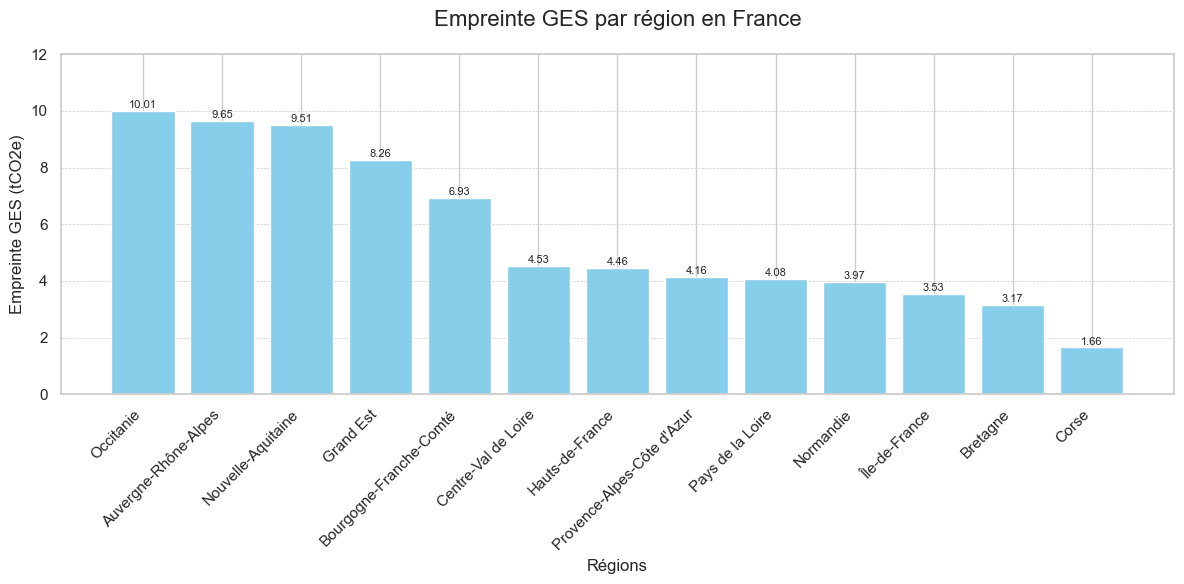

In [30]:
#Charger le CSV
geojson_path = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'

#Lire mon dataset  ds 
ds = pd.read_csv('Figure1.csv', sep = ';', encoding='ISO-8859-1') 
ds.head(97)  


#Supp la colonne km de ds 
ds = ds.drop(columns=["Distance domicile-travail moyenne\n(en km)"])
ds.head()

#Renommer 'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)' en  'GES'
ds.rename(columns={
    'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)': 'GES'
}, inplace=True)

#Transformer mes virgules en points de ds 
colonnes_a_modifier = ['GES']
for col in colonnes_a_modifier:
    ds[col] = ds[col].str.replace(",", ".", regex=False)
ds.head(97)

#Passer les valeurs numeriques en type float pour pouvoir les manipuler de ds 
ds['GES'] = ds['GES'].astype(float)

  
# Ajouter une correspondance complète des départements à leurs régions
ds['Region'] = departements_gdf['nom'].map({
    # Auvergne-Rhône-Alpes
    'Ain': 'Auvergne-Rhône-Alpes', 'Allier': 'Auvergne-Rhône-Alpes',
    'Ardèche': 'Auvergne-Rhône-Alpes', 'Cantal': 'Auvergne-Rhône-Alpes',
    'Drôme': 'Auvergne-Rhône-Alpes', 'Isère': 'Auvergne-Rhône-Alpes',
    'Loire': 'Auvergne-Rhône-Alpes', 'Haute-Loire': 'Auvergne-Rhône-Alpes',
    'Puy-de-Dôme': 'Auvergne-Rhône-Alpes', 'Rhône': 'Auvergne-Rhône-Alpes',
    'Savoie': 'Auvergne-Rhône-Alpes', 'Haute-Savoie': 'Auvergne-Rhône-Alpes',

    # Bourgogne-Franche-Comté
    'Côte-d\'Or': 'Bourgogne-Franche-Comté', 'Doubs': 'Bourgogne-Franche-Comté',
    'Jura': 'Bourgogne-Franche-Comté', 'Nièvre': 'Bourgogne-Franche-Comté',
    'Haute-Saône': 'Bourgogne-Franche-Comté', 'Saône-et-Loire': 'Bourgogne-Franche-Comté',
    'Yonne': 'Bourgogne-Franche-Comté', 'Territoire de Belfort': 'Bourgogne-Franche-Comté',

    # Bretagne
    'Côtes-d\'Armor': 'Bretagne', 'Finistère': 'Bretagne',
    'Ille-et-Vilaine': 'Bretagne', 'Morbihan': 'Bretagne',

    # Centre-Val de Loire
    'Cher': 'Centre-Val de Loire', 'Eure-et-Loir': 'Centre-Val de Loire',
    'Indre': 'Centre-Val de Loire', 'Indre-et-Loire': 'Centre-Val de Loire',
    'Loir-et-Cher': 'Centre-Val de Loire', 'Loiret': 'Centre-Val de Loire',

    # Corse
    'Corse-du-Sud': 'Corse', 'Haute-Corse': 'Corse',

    # Grand Est
    'Ardennes': 'Grand Est', 'Aube': 'Grand Est', 'Marne': 'Grand Est',
    'Haute-Marne': 'Grand Est', 'Meurthe-et-Moselle': 'Grand Est',
    'Meuse': 'Grand Est', 'Moselle': 'Grand Est', 'Bas-Rhin': 'Grand Est',
    'Haut-Rhin': 'Grand Est', 'Vosges': 'Grand Est',

    # Hauts-de-France
    'Aisne': 'Hauts-de-France', 'Nord': 'Hauts-de-France',
    'Oise': 'Hauts-de-France', 'Pas-de-Calais': 'Hauts-de-France',
    'Somme': 'Hauts-de-France',

    # Île-de-France
    'Paris': 'Île-de-France', 'Seine-et-Marne': 'Île-de-France',
    'Yvelines': 'Île-de-France', 'Essonne': 'Île-de-France',
    'Hauts-de-Seine': 'Île-de-France', 'Seine-Saint-Denis': 'Île-de-France',
    'Val-de-Marne': 'Île-de-France', 'Val-d\'Oise': 'Île-de-France',

    # Normandie
    'Calvados': 'Normandie', 'Eure': 'Normandie', 
    'Manche': 'Normandie', 'Orne': 'Normandie',
    'Seine-Maritime': 'Normandie',

    # Nouvelle-Aquitaine
    'Charente': 'Nouvelle-Aquitaine', 'Charente-Maritime': 'Nouvelle-Aquitaine',
    'Corrèze': 'Nouvelle-Aquitaine', 'Creuse': 'Nouvelle-Aquitaine',
    'Dordogne': 'Nouvelle-Aquitaine', 'Gironde': 'Nouvelle-Aquitaine',
    'Landes': 'Nouvelle-Aquitaine', 'Lot-et-Garonne': 'Nouvelle-Aquitaine',
    'Pyrénées-Atlantiques': 'Nouvelle-Aquitaine', 'Deux-Sèvres': 'Nouvelle-Aquitaine',
    'Vienne': 'Nouvelle-Aquitaine', 'Haute-Vienne': 'Nouvelle-Aquitaine',

    # Occitanie  
    'Ariège': 'Occitanie', 'Aude': 'Occitanie',
    'Aveyron': 'Occitanie', 'Gard': 'Occitanie',
    'Haute-Garonne': 'Occitanie', 'Gers': 'Occitanie',
    'Hérault': 'Occitanie', 'Lot': 'Occitanie',
    'Lozère': 'Occitanie', 'Hautes-Pyrénées': 'Occitanie',
    'Pyrénées-Orientales': 'Occitanie', 'Tarn': 'Occitanie',
    'Tarn-et-Garonne': 'Occitanie',

    # Pays de la Loire
    'Loire-Atlantique': 'Pays de la Loire', 'Maine-et-Loire': 'Pays de la Loire',
    'Mayenne': 'Pays de la Loire', 'Sarthe': 'Pays de la Loire',
    'Vendée': 'Pays de la Loire',

    # Provence-Alpes-Côte d'Azur
    'Alpes-de-Haute-Provence': 'Provence-Alpes-Côte d\'Azur',
    'Hautes-Alpes': 'Provence-Alpes-Côte d\'Azur',
    'Alpes-Maritimes': 'Provence-Alpes-Côte d\'Azur',
    'Bouches-du-Rhône': 'Provence-Alpes-Côte d\'Azur',
    'Var': 'Provence-Alpes-Côte d\'Azur',
    'Vaucluse': 'Provence-Alpes-Côte d\'Azur',
})
ds.head()

# Calculer la somme des GES par région  
ges_par_region = ds.groupby('Region')['GES'].sum().reset_index()
ges_par_region_ordre_decroissant = ges_par_region.sort_values(by='GES', ascending=False).reset_index(drop=True)



#Tracer mon diagramme d'emisssion de GES par région 
plt.figure(figsize=(12, 6))
bars = plt.bar(ges_par_region_ordre_decroissant['Region'], ges_par_region_ordre_decroissant['GES'], color='skyblue')

# Ajouter les valeurs sur chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, f'{height:.2f}', ha='center', fontsize=8)

# Personnalisation de la mise en page
plt.xlabel('Régions', fontsize=12)
plt.ylabel('Empreinte GES (tCO2e)', fontsize=12)
plt.title('Empreinte GES par région en France', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Affichage de l'échelle sur l'axe des ordonnées
plt.ylim(0, max(ges_par_region['GES']) + 2)

# Afficher le graphique
plt.tight_layout() 
plt.show()

# Conclusion :
Ces jeu de données vont nous permettre la réalisation d'une application dont l'interface sera un formulaire à remplir afin de décrire ses habitudes de déplacements afin de calculer son empreinte carbone et pourra selon le temps que l'on mettra à le développer faire des recommandations / des comparaisons concernant un autre type de transport.

Il pourra répondre à la problématique suivante : 

# Problématique : Quels modes de transports privilégier lors de nos trajets du quotidien pour limiter les émissions de GES ?